In [1]:
%matplotlib inline
import import_ipynb
import NeuralNet_FromScratch as nnfs_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from nnfs.datasets import spiral_data
from nnfs.datasets import sine_data
from zipfile import ZipFile
import nnfs
import os
import urllib
import urllib.request
import cv2

style.use("dark_background")

# Retreive Dataset

In [2]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

if not os.path.isdir(FOLDER):
    print("Unzipping images ...")
    with ZipFile(FILE) as zip_images:
        zip_images.extractall(FOLDER)
    print('DONE')
    
print("Date preparation is complete.")

Date preparation is complete.


# Fashion MNIST Classifications
0: T-shirt / top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle Boot

In [3]:
fashion_mnist_labels = {
    0:'T-shirt / top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

# Data Loading Function

In [4]:
def load_mnist_dataset(dataset, path):
    
    #scan all directories and create list of labels
    labels = os.listdir(os.path.join(path, dataset))
    
    #create lists for samples and labels
    X = []
    y = []
    
    #for each label folder
    for label in labels:
        #for each image in the given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            #read the image
            image = cv2.imread(os.path.join(\
                                path, dataset, label, file),\
                               cv2.IMREAD_UNCHANGED)
            
            #append image to x and label to y
            X.append(image)
            y.append(label)
            
    #convert data structure to numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# Create MNIST Train & Test Datasets

In [5]:
def create_data_mnist(path):
    
    #load both sets
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    #return all datasets
    return X, y, X_test, y_test

# Generate Train and Test Sets

In [6]:
X, y, X_test, y_test = create_data_mnist(FOLDER)
print(len(X))
print(len(y))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


# Data Preprocessing

## Scale features
range from -1 to 1

In [7]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


## Reshape Data
From 3D to 2D

In [8]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Shuffle Samples

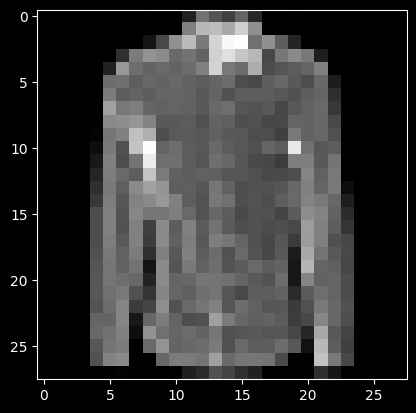

6


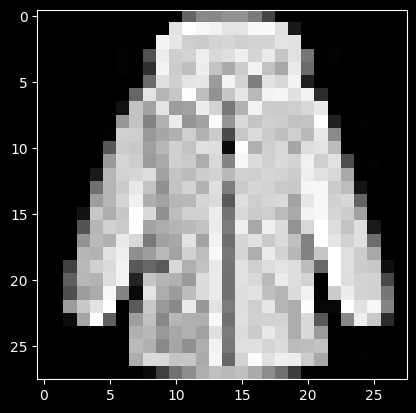

4


In [9]:
keys = np.array(range(X.shape[0])) #number of indices in samples
np.random.shuffle(keys) #shuffle indices

#grab by indice and assign to array
X = X[keys]
y = y[keys]

#test shuffling
plt.imshow(X[8].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[8])

plt.imshow(X[999].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[999])

# Training

In [10]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 64)) #dense layer 1 with 64 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(64,64)) #dense layer 2 with 64 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(64,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=5e-5),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=5, batch_size=128, print_every=100)



epoch: 1
step: 0, acc: 0.062, loss: 2.407 (data_loss: 2.407, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.758, loss: 0.640 (data_loss: 0.640, reg_loss: 0.000000), lr: 0.0009950248756218907
step: 200, acc: 0.805, loss: 0.542 (data_loss: 0.542, reg_loss: 0.000000), lr: 0.0009900990099009901
step: 300, acc: 0.797, loss: 0.512 (data_loss: 0.512, reg_loss: 0.000000), lr: 0.0009852216748768474
step: 400, acc: 0.852, loss: 0.419 (data_loss: 0.419, reg_loss: 0.000000), lr: 0.000980392156862745
step: 468, acc: 0.812, loss: 0.414 (data_loss: 0.414, reg_loss: 0.000000), lr: 0.0009771350400625367
epoch: 2
step: 0, acc: 0.883, loss: 0.394 (data_loss: 0.394, reg_loss: 0.000000), lr: 0.0009770873027505008
step: 100, acc: 0.852, loss: 0.434 (data_loss: 0.434, reg_loss: 0.000000), lr: 0.000972337012008362
step: 200, acc: 0.852, loss: 0.426 (data_loss: 0.426, reg_loss: 0.000000), lr: 0.0009676326866321544
step: 300, acc: 0.820, loss: 0.421 (data_loss: 0.421, reg_loss: 0.000000), lr: 0.00096297366267

In [11]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=10, batch_size=128, print_every=100)

epoch: 1
step: 0, acc: 0.195, loss: 2.905 (data_loss: 2.905, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.766, loss: 0.593 (data_loss: 0.593, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.852, loss: 0.446 (data_loss: 0.446, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.836, loss: 0.452 (data_loss: 0.452, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.836, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.854, loss: 0.360 (data_loss: 0.360, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.852, loss: 0.388 (data_loss: 0.388, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.859, loss: 0.413 (data_loss: 0.413, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.844, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.867, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000000), lr: 0.0005652911249

In [12]:
model.evaluate(X_test, y_test)

Validation, acc: 0.880, loss: 0.331


## Model training with parameter copying functionality

In [13]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=10, batch_size=128, print_every=100)

parameters = model.get_parameters()

#New model
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#set model with parameter instead of training it
model.set_parameters(parameters)

#evaluate the model
model.evaluate(X_test, y_test)

epoch: 1
step: 0, acc: 0.117, loss: 2.774 (data_loss: 2.774, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.789, loss: 0.583 (data_loss: 0.583, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.844, loss: 0.469 (data_loss: 0.469, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.805, loss: 0.489 (data_loss: 0.489, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.867, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.865, loss: 0.295 (data_loss: 0.295, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.844, loss: 0.403 (data_loss: 0.403, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.836, loss: 0.414 (data_loss: 0.414, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.875, loss: 0.370 (data_loss: 0.370, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.852, loss: 0.395 (data_loss: 0.395, reg_loss: 0.000000), lr: 0.0005652911249

## Save model parameters to file

In [14]:
model.save_parameters('fashion_mnist.parms')

## Load parameters from file and evaluate new model

In [15]:
#New model
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#set model with parameter instead of training it
model.load_parameters('fashion_mnist.parms')

#evaluate the model
model.evaluate(X_test, y_test)

Validation, acc: 0.881, loss: 0.335


## Save full serialized model to file

In [16]:
model.save('fashion_mnist.model')

## Load serialized model from file

In [17]:
model = nnfs_module.Model.load('fashion_mnist.model')
model.evaluate(X_test, y_test)

Validation, acc: 0.881, loss: 0.335


## Test predict functionality on test set

In [18]:
#predict on the first 5 samples from the validation set
#print result
confidences = model.predict(X_test[:5])
print(confidences)

#print the labels of the predicted values
predictions = model.output_layer_activation.predictions(confidences)
print(predictions)

[[1.89829973e-06 2.63677128e-07 5.02056861e-06 2.65449453e-06
  2.40354618e-06 3.77624812e-03 2.78284349e-06 3.79031264e-03
  3.61209305e-06 9.92414804e-01]
 [1.40162559e-05 2.17026814e-04 9.21974203e-07 2.42495126e-05
  1.03538775e-06 8.94721085e-01 1.03155181e-05 2.10514594e-02
  1.72975008e-03 8.22301397e-02]
 [2.60011064e-08 6.21938157e-09 1.05145424e-07 1.04922622e-07
  4.50473424e-08 1.02476320e-05 4.36950344e-08 1.25099285e-02
  4.89906439e-08 9.87479444e-01]
 [2.48159038e-10 9.78776252e-12 2.58413207e-10 1.64639483e-09
  1.44861136e-10 8.62867242e-08 3.00998010e-10 2.14040951e-04
  4.44603359e-11 9.99785870e-01]
 [8.80373007e-06 9.52023155e-06 2.52695484e-05 2.62681691e-05
  2.36832186e-05 1.53863991e-03 1.13326081e-05 9.70687897e-01
  1.02194452e-03 2.66466415e-02]]
[9 5 9 9 7]


In [19]:
#print first 5 sample target labels from test set
print(y_test[:5])

[9 9 9 9 9]


In [20]:
for prediction in predictions:
    print(fashion_mnist_labels[prediction])

Ankle Boot
Sandal
Ankle Boot
Ankle Boot
Sneaker


# Test model using real world data

## Get data
Image was trained on gray scale images

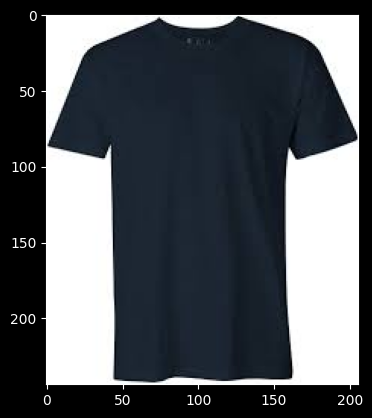

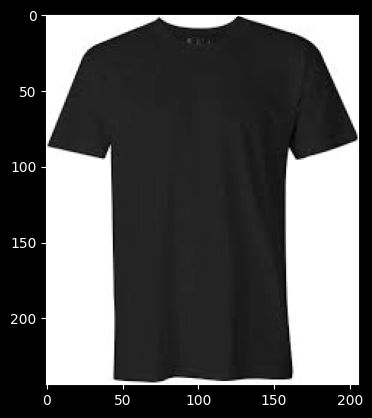

In [21]:
#import image data
image_data = cv2.imread('tshirt.png', cv2.IMREAD_UNCHANGED)

#view image
#convert cv2 from BGR to RGB
#and display using matplotlib
plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))
plt.show()

#import same image in gray scale
image_data = cv2.imread('tshirt.png', cv2.IMREAD_GRAYSCALE)

#view image in gray scale
plt.imshow(image_data, cmap='gray')
plt.show()

## Resize data
model was trained on 28x28 pixel images

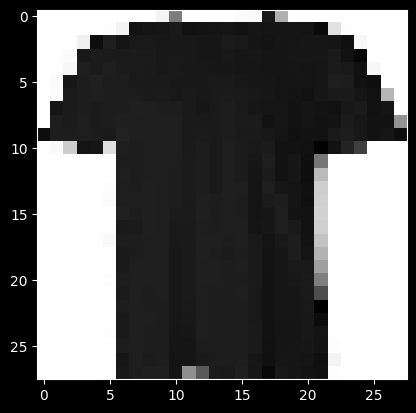

In [22]:
#resize image
image_data = cv2.resize(image_data, (28,28))

#display image
plt.imshow(image_data, cmap='gray')
plt.show()

## Invert image color
Model was trained on inverted images. Invert by subtracting all pixels from max pixel value (255; 0-255)

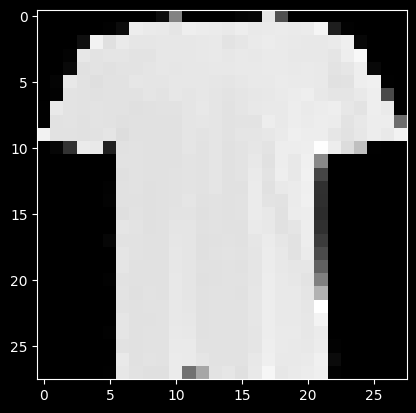

In [23]:
#invert image colors
image_data = 255 - image_data

#print inverted image
plt.imshow(image_data, cmap='gray')
plt.show()

## Reshape and scale pixel data
model was trained on scaled pixel values to be in range of -1 to 1 and flattend images (each sample is a row)

In [24]:
image_data = (image_data.reshape(1, -1).astype(np.float32) - 127.5) / 127.5

## Load the model and predict

In [25]:
#load model
model = nnfs_module.Model.load('fashion_mnist.model')

#predict on the image and get confidence levels
confidences = model.predict(image_data)

#get predictions in label form
predictions = model.output_layer_activation.predictions(confidences)

#get label from label dictionary
prediction = fashion_mnist_labels[predictions[0]]
print(prediction)

T-shirt / top


## Do all the same but on picture of trousers

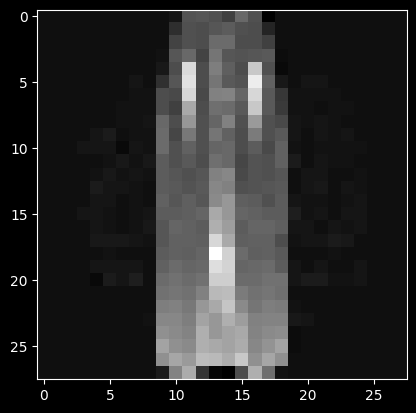

In [28]:
#read in image
image_data = cv2.imread('trousers.png', cv2.IMREAD_GRAYSCALE)

#resize the image to 28x28
image_data = cv2.resize(image_data, (28,28))

#invert image colors
image_data = 255 - image_data

#print image
plt.imshow(image_data, cmap='gray')
plt.show()

In [29]:
#flatten and scale image data
image_data = (image_data.reshape(1,-1).astype(np.float32) - 127.5) / 127.5

#load the model
model = nnfs_module.Model.load('fashion_mnist.model')

#predict on the image and get confidences
confidences = model.predict(image_data)

#get predictions in label form
predictions = model.output_layer_activation.predictions(confidences)

print(predictions)
prediction = fashion_mnist_labels[predictions[0]]
print(prediction)

[3]
Dress
